<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/NM/%D0%A0%D0%B0%D0%B7%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D1%8B_%D0%B2%D0%BE%D0%BF%D1%80%D0%BE%D1%81%D0%BE%D0%B2_%D0%B8_%D0%BE%D1%82%D0%B2%D0%B5%D1%82%D0%BE%D0%B2_%D0%BD%D0%B0_%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D0%B5_%D0%B1%D0%BE%D0%BB%D1%8C%D1%88%D0%B8%D1%85_%D1%8F%D0%B7%D1%8B%D0%BA%D0%BE%D0%B2%D1%8B%D1%85_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B5%D0%B9_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B4%D0%B4%D0%B5%D1%80%D0%B6%D0%BA%D0%B8_%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Установка необходимых библиотек
!pip install transformers datasets evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 7.8 MB/s eta 0:00:00


In [2]:
# Установка необходимых библиотек
!pip install transformers datasets torch scikit-learn matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 23.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [17]:
# Импорт библиотек
import torch
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from torch.utils.data import DataLoader
from transformers import (
    AutoTokenizer,
    AutoModelForQuestionAnswering,
    Trainer,
    TrainingArguments,
    DataCollatorWithPadding,
)
from datasets import load_dataset, DatasetDict
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Загрузка датасета SQuAD
dataset = load_dataset("squad")

# Создание нового DatasetDict с первыми 100 записями
small_dataset = DatasetDict({
    'train': dataset['train'],#.select(range(50)),
    'validation': dataset['validation']#.select(range(50))
})

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-4-43114928e552>:118: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Exact Match,F1
1,No log,nan,0.000000,0.006349
2,1.453000,nan,0.000000,0.006349
3,0.941600,nan,0.000000,0.006469


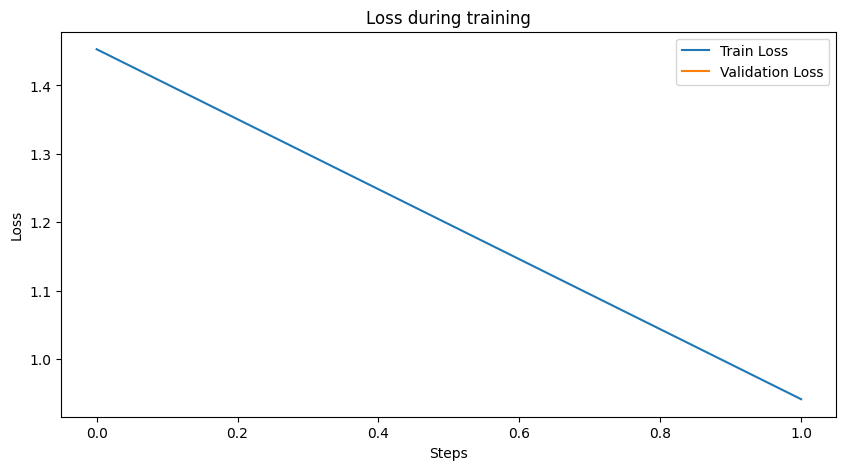

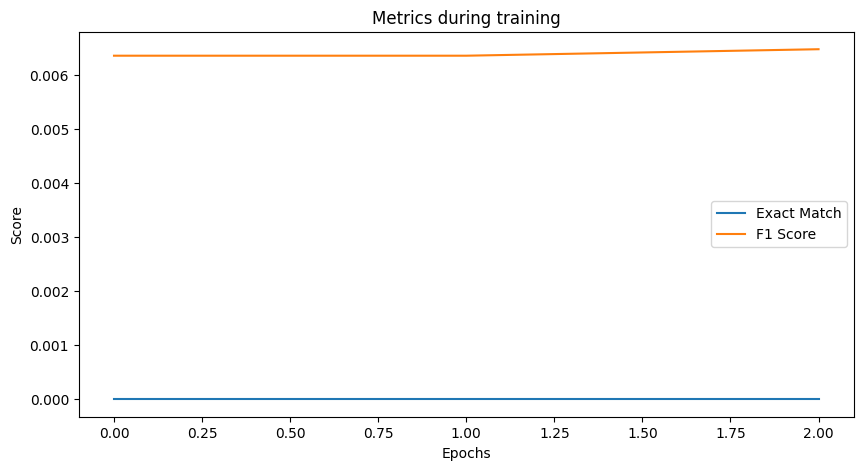

In [4]:
# Выбор предобученной модели (например, BERT)
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Функция для токенизации данных
def preprocess_function(examples):
    questions = [q.strip() for q in examples["question"]]
    inputs = tokenizer(
        questions,
        examples["context"],
        max_length=384,
        truncation="only_second",
        return_offsets_mapping=True,
        padding="max_length",
    )
    offset_mapping = inputs.pop("offset_mapping")
    answers = examples["answers"]
    start_positions = []
    end_positions = []

    for i, offset in enumerate(offset_mapping):
        answer = answers[i]
        start_char = answer["answer_start"][0]
        end_char = answer["answer_start"][0] + len(answer["text"][0])
        sequence_ids = inputs.sequence_ids(i)

        # Нахождение токенов, соответствующих началу и концу ответа
        idx = 0
        while sequence_ids[idx] != 1:
            idx += 1
        context_start = idx

        if start_char == 0:
            start_positions.append(0)
            end_positions.append(0)
        else:
            token_start_index = context_start
            token_end_index = len(inputs.input_ids[i]) - 1

            while token_start_index < len(offset) and offset[token_start_index][0] <= start_char:
                token_start_index += 1
            start_positions.append(token_start_index - 1)

            while token_end_index >= 0 and offset[token_end_index][1] >= end_char:
                token_end_index -= 1
            end_positions.append(token_end_index + 1)

    inputs["start_positions"] = start_positions
    inputs["end_positions"] = end_positions
    return inputs

# Применение функции предобработки к уменьшенному датасету
tokenized_datasets = small_dataset.map(preprocess_function, batched=True, remove_columns=small_dataset["train"].column_names)

# Загрузка предобученной модели для QA
model = AutoModelForQuestionAnswering.from_pretrained(model_name)

# Определение функции вычисления метрик
def compute_metrics(p):
    # p.predictions содержит (start_logits, end_logits)
    start_logits, end_logits = p.predictions
    # p.label_ids содержит (start_true, end_true)
    start_true, end_true = p.label_ids

    # Преобразуем logits в предсказания
    start_pred = np.argmax(start_logits, axis=1)
    end_pred = np.argmax(end_logits, axis=1)

    # Вычисляем точное совпадение
    exact_match = np.mean((start_true == start_pred) & (end_true == end_pred))

    # Вычисляем F1-score для начала и конца ответов
    f1_start = f1_score(start_true, start_pred, average="macro")
    f1_end = f1_score(end_true, end_pred, average="macro")
    f1 = (f1_start + f1_end) / 2

    return {"exact_match": exact_match, "f1": f1}

# Настройка параметров обучения
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    report_to="none",  # Отключение W&B
)

# Создание объекта Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer),
    compute_metrics=compute_metrics,
)

# Обучение модели
trainer.train()

# Визуализация результатов
metrics = trainer.state.log_history

# График потерь
train_loss = [m["loss"] for m in metrics if "loss" in m]
eval_loss = [m["eval_loss"] for m in metrics if "eval_loss" in m]

plt.figure(figsize=(10, 5))
plt.plot(train_loss, label="Train Loss")
plt.plot(eval_loss, label="Validation Loss")
plt.title("Loss during training")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.legend()
plt.show()

# График метрик
exact_match = [m["eval_exact_match"] for m in metrics if "eval_exact_match" in m]
f1_scores = [m["eval_f1"] for m in metrics if "eval_f1" in m]

plt.figure(figsize=(10, 5))
plt.plot(exact_match, label="Exact Match")
plt.plot(f1_scores, label="F1 Score")
plt.title("Metrics during training")
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.legend()
plt.show()

In [15]:
# Функция предобработки данных
def preprocess_function(examples):
    questions = [q.strip() for q in examples["question"]]
    inputs = tokenizer(
        questions,
        examples["context"],
        max_length=384,
        truncation="only_second",
        return_offsets_mapping=True,
        padding="max_length",
    )
    offset_mapping = inputs.pop("offset_mapping")
    answers = examples["answers"]
    start_positions = []
    end_positions = []

    for i, offset in enumerate(offset_mapping):
        answer = answers[i]
        start_char = answer["answer_start"][0]
        end_char = answer["answer_start"][0] + len(answer["text"][0])
        sequence_ids = inputs.sequence_ids(i)

        # Нахождение токенов, соответствующих началу и концу ответа
        idx = 0
        while sequence_ids[idx] != 1:
            idx += 1
        context_start = idx

        if start_char == 0:
            start_positions.append(0)
            end_positions.append(0)
        else:
            token_start_index = context_start
            token_end_index = len(inputs.input_ids[i]) - 1

            while token_start_index < len(offset) and offset[token_start_index][0] <= start_char:
                token_start_index += 1
            start_positions.append(token_start_index - 1)

            while token_end_index >= 0 and offset[token_end_index][1] >= end_char:
                token_end_index -= 1
            end_positions.append(token_end_index + 1)

    inputs["start_positions"] = start_positions
    inputs["end_positions"] = end_positions
    inputs["offset_mapping"] = offset_mapping  # Сохраняем offset_mapping
    return inputs


# Функция обработки предсказаний
def postprocess_predictions(predictions, dataset):
    start_logits, end_logits = predictions
    n_best = 20  # Количество лучших ответов для каждого вопроса
    max_answer_length = 30  # Ограничение максимальной длины ответа
    predictions = []

    for i, example in enumerate(dataset):
        offset_mapping = example["offset_mapping"]
        context = example["context"]

        # Находим топ-N начал и концов ответов
        start_indexes = np.argsort(-start_logits[i])[:n_best]
        end_indexes = np.argsort(-end_logits[i])[:n_best]

        best_answer = ""
        best_score = -np.inf

        for start_index in start_indexes:
            for end_index in end_indexes:
                if (
                    start_index >= len(offset_mapping) or
                    end_index >= len(offset_mapping) or
                    offset_mapping[start_index] is None or
                    offset_mapping[end_index] is None or
                    end_index < start_index or
                    end_index - start_index + 1 > max_answer_length  # Ограничиваем длину ответа
                ):
                    continue

                # Вычисляем общую оценку для пары (начало, конец)
                score = start_logits[i][start_index] + end_logits[i][end_index]

                # Преобразуем индексы токенов в позиции символов в контексте
                start_char = offset_mapping[start_index][0]
                end_char = offset_mapping[end_index][1]
                answer = context[start_char:end_char]

                # Обновляем лучший ответ, если текущий лучше
                if score > best_score:
                    best_answer = answer
                    best_score = score

        # Добавляем лучший ответ в список предсказаний
        predictions.append(best_answer)

    return predictions


# Загрузка тестового набора данных
test_dataset = load_dataset("squad", split="validation")
test_dataset = test_dataset.select(range(50))  # Используем первые 50 записей

# Предобработка тестовых данных, сохраняя нужные столбцы
columns_to_keep = ['context', 'question', 'answers']
columns_to_remove = [col for col in test_dataset.column_names if col not in columns_to_keep]
tokenized_test_dataset = test_dataset.map(
    preprocess_function,
    batched=True,
    remove_columns=columns_to_remove
)

# Получение предсказаний
predictions = trainer.predict(tokenized_test_dataset)
start_logits, end_logits = predictions.predictions

# Обработка предсказаний
predicted_answers = postprocess_predictions((start_logits, end_logits), tokenized_test_dataset)

# Извлечение истинных ответов
true_answers = [example["answers"]["text"][0] if example["answers"]["text"] else "" for example in test_dataset]

# Оценка качества
exact_match = accuracy_score(true_answers, predicted_answers)

# Оценка F1-score с учетом точности слов
f1 = f1_score(
    [ans.lower().strip() for ans in true_answers],
    [ans.lower().strip() for ans in predicted_answers],
    average="micro"
)

print(f"Exact Match: {exact_match:.4f}")
print(f"F1 Score: {f1:.4f}")

# Вывод примеров
for i in range(5):
    print(f"Question: {test_dataset[i]['question']}")
    print(f"Context: {test_dataset[i]['context']}")
    print(f"True Answer: {true_answers[i]}")
    print(f"Predicted Answer: {predicted_answers[i]}")
    print("-" * 50)

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Exact Match: 0.0000
F1 Score: 0.0000
Question: Which NFL team represented the AFC at Super Bowl 50?
Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.
True Answer: Denver Broncos
Predicted Answer: Carolina Panthers 24–10 to earn their third Super Bowl title. The gam